In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.utils import shuffle

In [ ]:
X_train = pd.read_csv("./data/X_train_text.csv")
X_submission = pd.read_csv("./data/X_test_text.csv")

In [ ]:
X_train = X_train.drop(columns=['ProductId', 'UserId', 'Summary', 'Text', 'about', 'act', 'actor', 'after', 'again', 'all', 'also', 'an',
       'ani', 'are', 'as', 'at', 'back', 'be', 'becaus', 'been', 'befor', 'by', 'can', 'cast', 'charact',
       'come', 'could', 'did', 'do', 'doe', 'don', 'dvd', 'end', 'even', 'ever', 'feel', 'film', 'find', 'first', 'for',
       'from', 'get', 'give', 'go', 'had', 'has', 'have', 'he', 'her', 'here', 'high', 'him', 'his', 'how', 'if', 'in','into', 'is', 'it',
       'just', 'know', 'life', 'littl', 'look', 'lot', 'made', 'make', 'man', 'mani', 'me', 'more', 'most', 'movi', 'much', 'my', 'never',
       'new', 'now', 'of', 'off', 'on', 'one', 'onli', 'or', 'other', 'out', 'over', 'own', 'old', 'perform',
       'play', 'part', 'peopl', 'plot', 'realli', 'say', 'scene', 'see', 'seem', 'seen', 'seri', 'set', 'she', 'show', 'so', 'some', 'star', 'still', 'stori',
       'take', 'than', 'that', 'their', 'them', 'then', 'there', 'these',
       'they', 'thing', 'think', 'this', 'those', 'time', 'to', 'too', 'tri', 'two', 'up', 'use', 'veri', 'want', 'was', 'watch', 'way',
       'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'will', 'with', 'work', 'would', 'year', 'you', 'your'])
X_submission = X_submission.drop(columns=['ProductId', 'UserId', 'Score', 'Summary', 'Text', 'about', 'act', 'actor', 'after', 'again', 'all', 'also', 'an',
       'ani', 'are', 'as', 'at', 'back', 'be', 'becaus', 'been', 'befor', 'by', 'can', 'cast', 'charact',
       'come', 'could', 'did', 'do', 'doe', 'don', 'dvd', 'end', 'even', 'ever', 'feel', 'film', 'find', 'first', 'for',
       'from', 'get', 'give', 'go', 'had', 'has', 'have', 'he', 'her', 'here', 'high', 'him', 'his', 'how', 'if', 'in','into', 'is', 'it',
       'just', 'know', 'life', 'littl', 'look', 'lot', 'made', 'make', 'man', 'mani', 'me', 'more', 'most', 'movi', 'much', 'my', 'never',
       'new', 'now', 'of', 'off', 'on', 'one', 'onli', 'or', 'other', 'out', 'over', 'own', 'old', 'perform',
       'play', 'part', 'peopl', 'plot', 'realli', 'say', 'scene', 'see', 'seem', 'seen', 'seri', 'set', 'she', 'show', 'so', 'some', 'star', 'still', 'stori',
       'take', 'than', 'that', 'their', 'them', 'then', 'there', 'these',
       'they', 'thing', 'think', 'this', 'those', 'time', 'to', 'too', 'tri', 'two', 'up', 'use', 'veri', 'want', 'was', 'watch', 'way',
       'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'will', 'with', 'work', 'would', 'year', 'you', 'your'])
X_train.columns.values

array(['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score',
       'Time', 'bad', 'best', 'better', 'but', 'enjoy', 'fan', 'good',
       'great', 'interest', 'like', 'love', 'no', 'not', 'well',
       'ProductCode', 'UserCode'], dtype=object)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
        X_train.drop(['Score'], axis=1),
        X_train['Score'],
        test_size=0.2,
        random_state=0
    )

In [ ]:
X_train_processed = X_train.drop(columns=['Id'])
X_test_processed = X_test.drop(columns=['Id'])
X_submission_processed = X_submission.drop(columns=['Id'])

In [ ]:
model = LogisticRegression(class_weight='balanced', n_jobs=4)
model.fit(X_train_processed, Y_train)

LogisticRegression(class_weight='balanced', n_jobs=4)

Accuracy on testing set =  0.4769469100952749
MAE =  1.7703241779275654


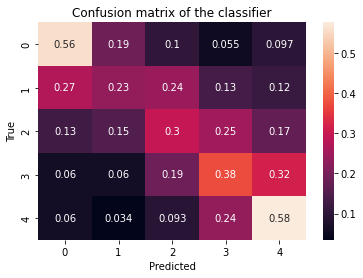

In [ ]:
Y_test_predictions = model.predict(X_test_processed)

print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))
print("MAE = ", mean_squared_error(Y_test, Y_test_predictions))

cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
model = LogisticRegression(class_weight='balanced', n_jobs=4)
model.fit(pd.concat([X_train_processed, X_test_processed], ignore_index=True), pd.concat([Y_train, Y_test], ignore_index=True))
X_submission['Score'] = model.predict(X_submission_processed)

In [ ]:
submission = X_submission[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)